In [1]:
import matplotlib.pyplot as plt

from src.tools.tools import *
from src.models.statistical.rule_based_functions import *
from src.models.statistical.stationary_models import *

from statsmodels.tsa.statespace.sarimax import SARIMAX

import pandas as pd



df = pd.read_csv('./data/short_seasonal.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])
ts = df.set_index("timestamp")["value"]
ts = ts.asfreq('ME')

lables = df.set_index("timestamp")["labels"]

14:49:55 - cmdstanpy - INFO - Chain [1] start processing
14:49:55 - cmdstanpy - INFO - Chain [1] done processing


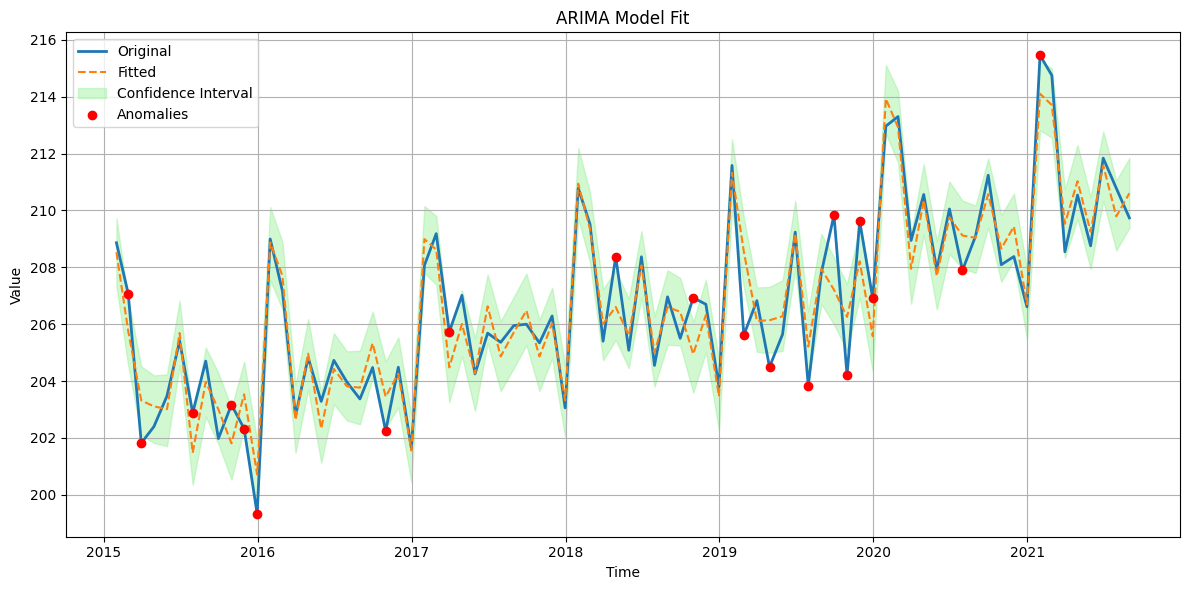

In [20]:
from prophet import Prophet

prophet_df = pd.DataFrame({
    'ds': ts.index,  
    'y': ts.values 
})

model = Prophet()
model.fit(prophet_df)

prophet_pred = model.predict(prophet_df[['ds']].copy())

prophet_anom = (prophet_df['y'] < prophet_pred['yhat_lower']) | (prophet_df['y'] > prophet_pred['yhat_upper'])
prophet_anom = pd.Series(prophet_anom.values, index=ts.index)

prophet_CI = prophet_pred[['yhat_lower', 'yhat_upper']].copy()
prophet_CI.index = ts.index

plot_fit(ts, pd.Series(prophet_pred['yhat'].values, index=ts.index), CI=prophet_CI, anom=prophet_anom)

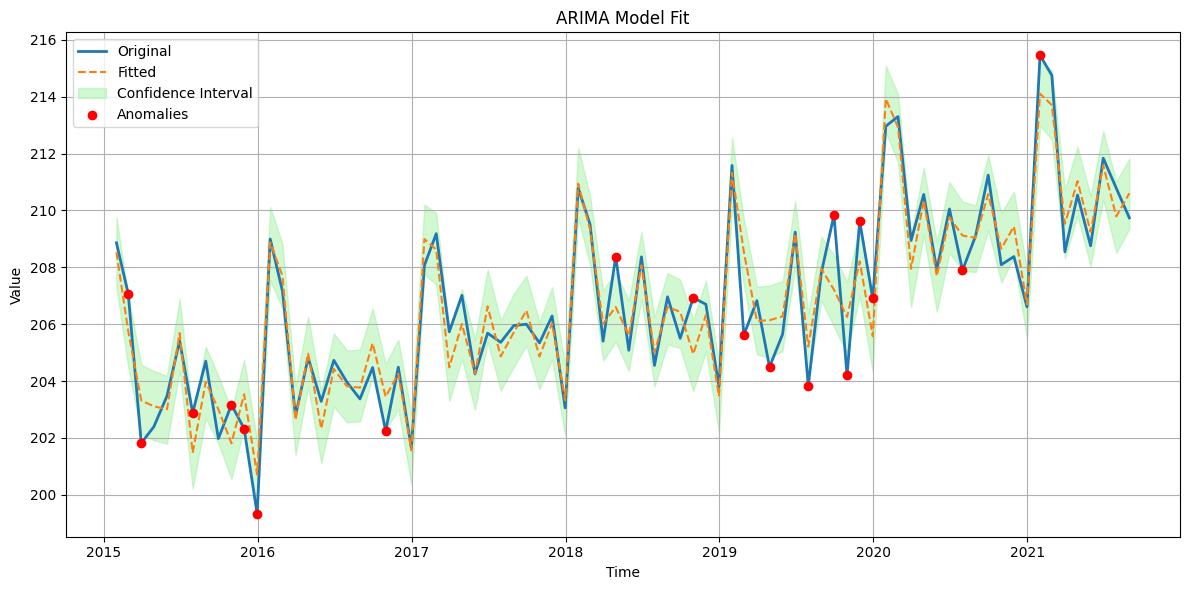